## Z-Transform

Q1. Plot the pole zero locations and time domain impulse response (clearly mark the point n=0 ) for the following transfer functions. Assume all signals are causal. If the DTFT exists, plot the magnitude, phase and group delay from $-\pi$ to $\pi$.
<ol>
  <li>$ \frac{1}{1+az^{-1}} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)  </li>
 <li>$ \frac{1}{(1+az^{-1})^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)  </li>
  <li>$\frac{1}{1-az^{-1}+{(az^{-1})}^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Complex conjugate poles) </li>    
</ol>
Which of the responses corresponds to stable LTI systems?

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.tf2zpk.html

**Part 1: a = $ \frac{1}{1+az^{-1}} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from matplotlib import patches 
from matplotlib.pyplot import axvline, axhline
import warnings 
warnings.filterwarnings("ignore")
#import zp
def plot_zpk(zeros, poles, k):
    ax = plt.subplot(2, 2, 1)
    unit_circle = patches.Circle((0,0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    t1 = plt.plot(zeros.real, zeros.imag, 'o', markersize=10.0, alpha=1,color = 'black')
    t2 = plt.plot(poles.real, poles.imag, 'x', markersize=10.0, alpha=1, color = 'black')
    
def pole_zero(b,a, flag = 0):
    #1 
    #b=[1]
    plt.figure(figsize = (8, 8))
    z,p,k =sig.tf2zpk(b,a)
    plot_zpk(z,p,k)
    if flag:
        print(p) 
    t1=plt.plot(z.real, z.imag, 'ro', p.real, p.imag, 'rx')
    plt.setp(t1, markersize=12.0, markeredgewidth=2.0)
    plt.show()
    
def get_freq_resp( num, den, c_range=np.arange(-np.pi, np.pi, 2*np.pi/4096)):
    w1,h1=sig.freqz(num,den,c_range)
    h1db=20*np.log10(abs(h1))
    
    #print("b=" ,num)
    #print("a=",den)
    plt.figure(figsize = (12, 4))
    plt.subplot(121)
    plt.plot(w1/(2*np.pi),h1db)
    plt.title("Magnitude response")
    plt.ylabel("magnitude in DB")
    plt.xlabel(" w / 2.pi ")
    #plt.show()

    angles = np.angle(h1)
    plt.subplot(122)
    plt.plot(w1/(2*np.pi), angles, 'g')
    plt.title("Phase response")
    plt.ylabel("Phase in radians")
    plt.xlabel(" w / 2.pi ")
    plt.show()
    
def get_impluse_response(b, a):
    
    impulse_response = sig.dimpulse((b, a, 1))
    plt.figure(figsize = (18, 5))
    plt.stem(impulse_response[0], impulse_response[1][0])
    plt.title('impulse Response')
    plt.show()
    
def get_group_delay(b, a):
    
    w_gd, gd = sig.group_delay((b, a))
    plt.plot(w_gd/np.pi, gd, 'b')
    plt.plot(-1*w_gd/np.pi, -1*gd, 'b')
    plt.title('Group Delay')
    plt.xlabel('Frequency')
    plt.ylabel('-d(phi)/dw')
    plt.show()

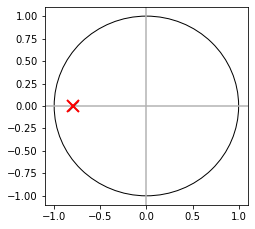

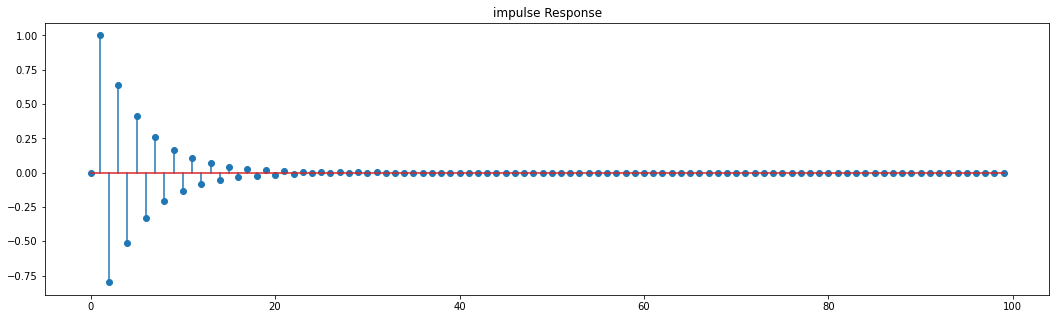

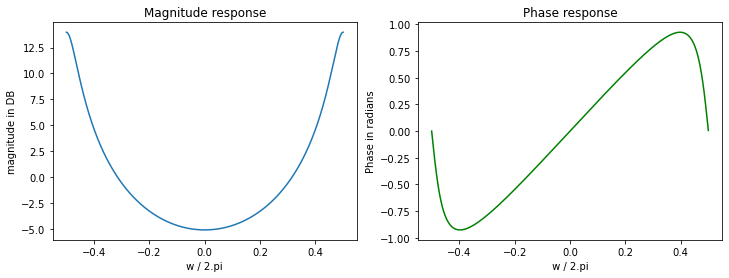

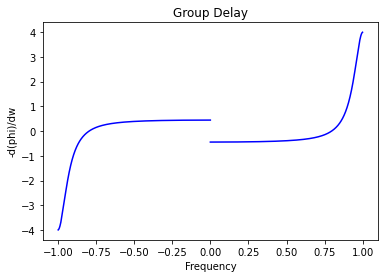

In [9]:
#2
b=[1]
a=[1,0.8]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b, a)

This is stable system for all causal signal, as ROC will always contains unit circle


---

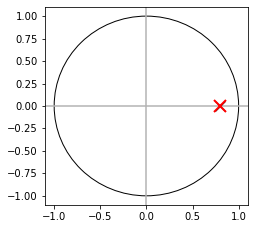

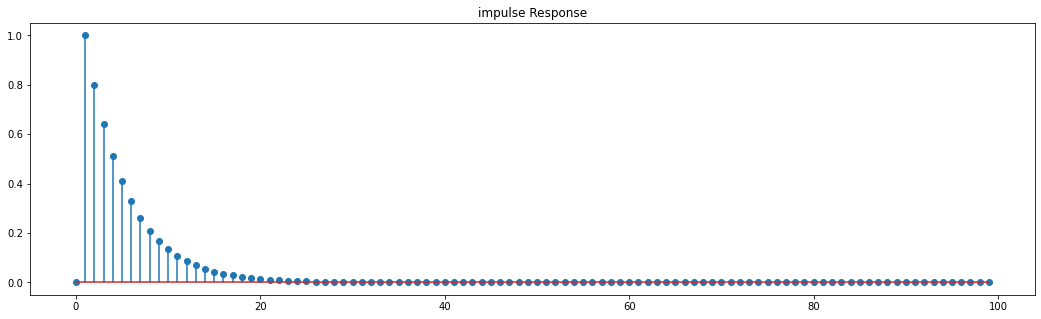

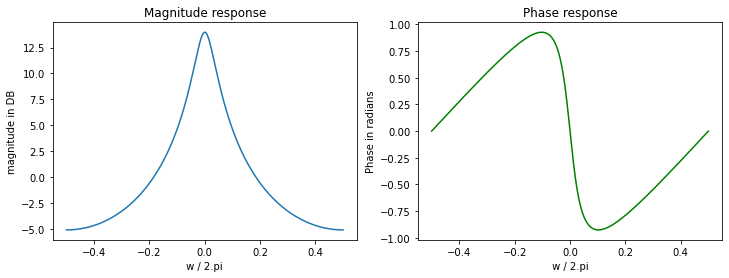

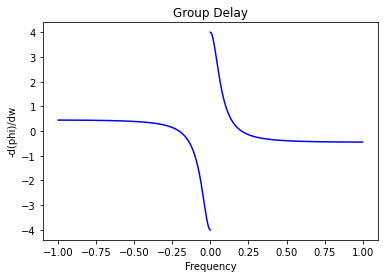

In [10]:
# Q1, part 1, a = -0.8
b=[1]
a=[1,-0.8]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b, a)

This is stable system for all causal signal, as ROC will always contains unit circle

---

In [ ]:
# Q1, part 1, a = 1
b=[1]
a=[1,1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

This is marginally stable system for all causal signal.

---

In [ ]:
# Q1, part 1 a = -1
b=[1]
a=[1,-1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

This is marginally stable system for all causal signal.

---

In [ ]:
b=[1]
a=[1,2]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

This is unstable system for all causal signal, as ROC will not includes unit circle.

---

In [ ]:
b=[1]
a=[1,-2]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

**Part 1 observations - system is stable for a = +0.8, -0.8 , marginally stable for a = +1,-1 and unstable for a=+2, -2 for
  all causal signals**

---

**part 2: $ \frac{1}{(1+az^{-1})^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)**

In [ ]:
b=[1]
a=[1,1.6,0.64]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b=[1]
a=[1,-1.6,0.64]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b=[1]
a=[1,2,1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b=[1]
a=[1,-2,1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b=[1]
a=[1,4,4]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

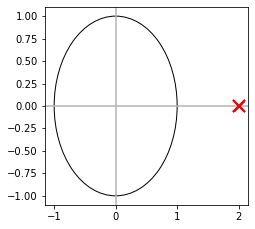

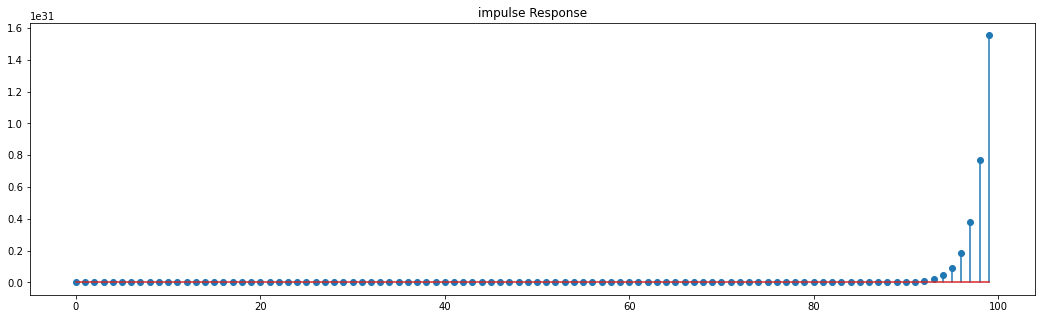

In [11]:
b=[1]
a=[1,-4,4]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

**Part 2 observations - system is stable for a = +0.8, -0.8 , marginally stable for a = +1,-1 and unstable for a=+2, -2 for
  all causal signals**

**Part 3: $\frac{1}{1-az^{-1}+{(az^{-1})}^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$** 

In [ ]:
b =[1]
a=[1,-0.8,0.64]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b =[1]
a=[1,0.8,0.64]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b =[1]
a=[1,-1,1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b =[1]
a=[1,1,1]
pole_zero(b,a)
get_impluse_response(b, a)
get_freq_resp(b,a)
get_group_delay(b,a)

In [ ]:
b =[1]
a=[1,-2,4]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

In [ ]:
b =[1]
a=[1,2,4]
pole_zero(b,a)
get_impluse_response(b, a)
#get_freq_resp(b,a)
#get_group_delay(b,a)

**Part 3 observations - system is stable for a = +0.8, -0.8 , marginally stable for a = +1,-1 and unstable for a=+2, -2 for
  all causal signals**

Q2. Plot the pole zero locations of the following finite impulse response functions. Find the magnitude phase and group delay as a function of frequency from $-\pi$ to $\pi$.
<ol>
  <li>$ z + 2 + z^{-1}$ </li>
  <li>$ 1 + 2z^{-1} + 3z^{-2} + 2z^{-3} + z^{-4}$ </li>
  <li>$ 1 + 2z^{-1} - 2z^{-3} - z^{-4} $ </li>
   <li>$ 1 + 2z^{-1} + 3z^{-2} + 4z^{-3} + 5z^{-4} $ </li>    
</ol>
Where are the poles located? What is the type of response in each case? What is the advantage of symmetric/anti-symmetric filters?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

symmetry: Linear phase filter, No phase distortion, all frequencies delayed by the same
<br>anti-symmetry: Phase shifters


[]


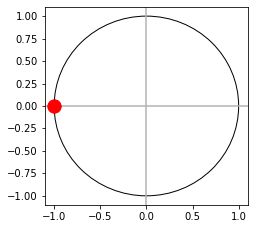

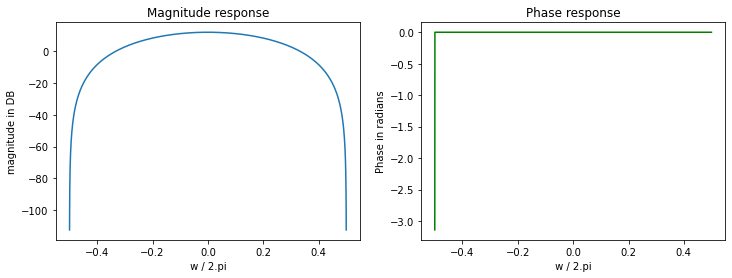

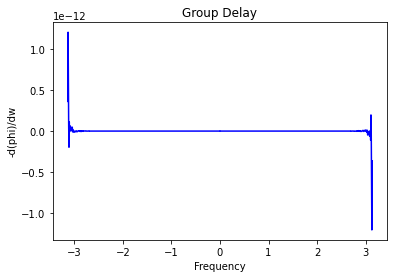

In [12]:
# Q2 part 1
b =[1,2,1]
a=[0,1]
pole_zero(b,a, 1)
get_freq_resp(b,a)

w_gd, gd = sig.group_delay((b, a))
plt.plot(w_gd, gd, 'b')
plt.plot(-1*w_gd, -1*gd, 'b')
plt.title('Group Delay')
plt.xlabel('Frequency')
plt.ylabel('-d(phi)/dw')
plt.show()

**No pole. Group delay is 0.
  Type - 1 system h[n] is even**

---

In [ ]:
b =[1,2,3,2,1]
a=[1]
pole_zero(b,a, 1)
get_freq_resp(b,a)

w_gd, gd = sig.group_delay((b, a))
plt.plot(w_gd, gd, 'b')
plt.plot(-1*w_gd, -1*gd, 'b')
plt.title('Group Delay')
plt.xlabel('Frequency')
plt.ylabel('-d(phi)/dw')
plt.show()

**System has No poles.
  Group delay = m/2 = 2. (where m is for , m+1 non zero points in h[n])
  Type - I filter, as h[n] is even.**

----

In [ ]:
b =[1,2,0,-2,-1]
a=[1]
pole_zero(b,a, 1)
get_freq_resp(b,a)

w_gd, gd = sig.group_delay((b, a))
plt.plot(w_gd, gd, 'b')
plt.plot(-1*w_gd, -1*gd, 'b')
plt.title('Group Delay')
plt.xlabel('Frequency')
plt.ylabel('-d(phi)/dw')
plt.show()

**System has No poles.
  Group delay = m/2 = 2.
  It is a Type -III system as h[n] is odd**.

----

In [ ]:
b =[1,2,3,4,5]
a=[1]
pole_zero(b,a, 1)
get_freq_resp(b,a)

w_gd, gd = sig.group_delay((b, a))
plt.plot(w_gd, gd, 'b')
plt.plot(-1*w_gd, -1*gd, 'b')
plt.title('Group Delay')
plt.xlabel('Frequency')
plt.ylabel('-d(phi)/dw')
plt.show()

**System has No pole, No constant group delay.**

---

Q3. Compute the causal inverse of $H(z) = \frac{z^{-1}+0.5z^{-2}}{1-0.6z^{-1}+2z^{-2}}$. (use <i>scipy.signal.residuez</i>) Is the system stable?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residuez.html

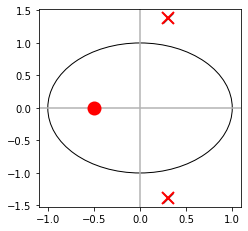

In [38]:
b = [0, 1, 0.5]
a = [1 , -0.6 , 2]

pole_zero(b,a)
#get_impluse_response(b, a)

$G(z) = \frac{1}{H(z)}$
<br>
$H(z) = \frac{z^{-1}+0.5z^{-2}}{1-0.6z^{-1}+2z^{-2}}$
<br>
$G(z) = \frac{1-0.6z^{-1}+2z^{-2}}{z^{-1}+0.5z^{-2}}$

In [29]:
r, p, k = sig.residuez(b, a, tol=0.001, rtype='avg')
print(r,p,k)

[-0.125-0.38892135j -0.125+0.38892135j] [0.3+1.3820275j 0.3-1.3820275j] [0.25]


In [30]:
#b1, a1 = sig.invresz(p, r, k, tol=0.001, rtype='avg')
#print(b1,a1)

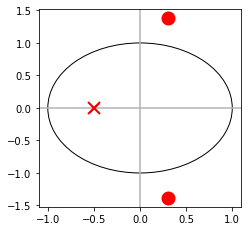

In [39]:
pole_zero(a,b)
#pole_zero(b1,a1)
#get_impluse_response(b1, a1)

**Q3 observations : The causal inverse of the given system is unstable.**

---

Q4. Solve the system with difference equation $y[n] - 0.8y[n - 1] = 0.5(x[n] + x[n - 1])$ with the initial condition is given by $y[-1] = -2$. Plot the output sequence for input 
$~~ (a)~ x[n] = u[n] - u[n - 10] $ and  $~~ (b)~ x[n] = 2(u[n] - u[n - 10])$. Could the system be linear? Repeat the experiment
with zero initial conditions. ( Use scipy.sig.lfilter )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b_sig = [0.5, 0.5]
a_sig = [1, -0.8]
y_init = [-2]

In [ ]:
z = sig.lfiltic(b_sig, a_sig, y_init)
print(z)

In [ ]:
x_inp = np.ones(10)
y, zf = sig.lfilter(b_sig, a_sig, x_inp , zi=z)

In [ ]:
plt.stem(y)
plt.title('With initial condition')
plt.show()
print(zf)

In [ ]:
# with no initial condition
b_sig = [0.5, 0.5]
a_sig = [1, -0.8]

x_inp = np.ones(10)
y = sig.lfilter(b_sig, a_sig, x_inp)

plt.stem(y)
plt.title('Without initial condition')
plt.show()
#print(zf)

In [ ]:
x_inp2 = 2*np.ones(10)
y2, zf2 = sig.lfilter(b_sig, a_sig, x_inp2 , zi=z)
plt.stem(y2)
plt.title('With initial condition')
plt.show()
print(zf2)

In [ ]:
x_inp2 = 2*np.ones(10)
y2= sig.lfilter(b_sig, a_sig, x_inp2)
plt.stem(y2)
plt.title('With initial condition')
plt.show()
#print(zf2)

**Q4 observations - This system is linear.**

With initial condition, system is non-linear

---

Q5. For the LTI systems described by the following difference equation, generate the frequency response. Obtain the pole zero plot. Comment on the type of response.

$y[n] + 1.3y[n - 1] + 1.29y[n - 2] + 0.52y[n - 3] + 0.16y[n - 4] = x[n] - 0.9x[n - 1]$

$y[n] - 1.3y[n - 1] + 1.29y[n - 2] - 0.52y[n - 3] + 0.16y[n - 4] = x[n] + 0.9x[n - 1]$

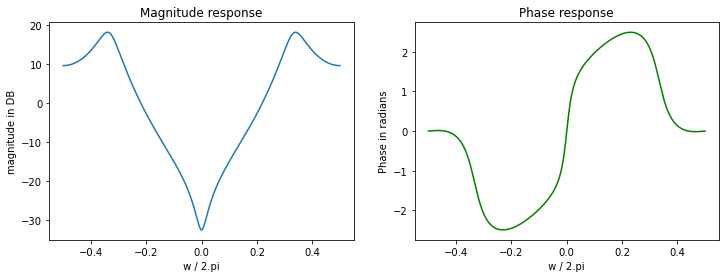

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b_51= [1,-0.9]
a_51 = [1, 1.3, 1.29, 0.52,0.16]
get_freq_resp(b_51,a_51)

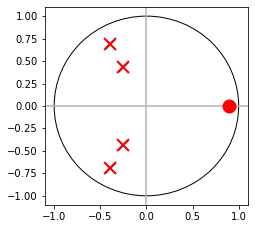

In [91]:
pole_zero(b_51, a_51)

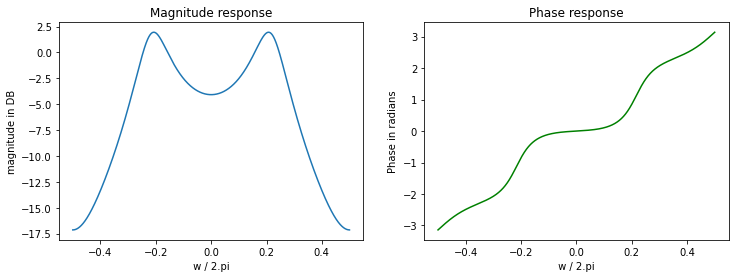

In [92]:
b_52 = [1, 0.9]
a_52 = [ 1, -1.3 , 1.29, -.52, 0.16]
get_freq_resp(b,a)

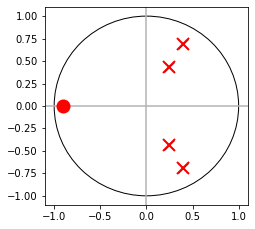

In [93]:
pole_zero(b_52, a_52)

----

Q6. Consider an IIR filter described by $y[n] = 0.9y[n - 1] + x[n]$. Find the impulse response $h[n]$. Truncate $h[n]$ to three terms to obtain $h_3[n]$. Plot the DTFT of $h[n]$ and $h_3[n]$. Now truncate $h[n]$ to ten terms to obtain $h_{10}[n]$. Plot the DTFT of $h[n]$ and $h_{10}[n]$. If the same input is applied to the truncated and original filter, will the greatest mismatch in the response occur earlier or later time instances $n$ ?

In [ ]:
#butter = sig.dlti(*sig.butter(3, 0.5))
#butter

In [40]:
x_6 = np.array([[1,0]])
b_6 = [1]
a_6 = [1, -0.9] # (0.9)^n u[n]

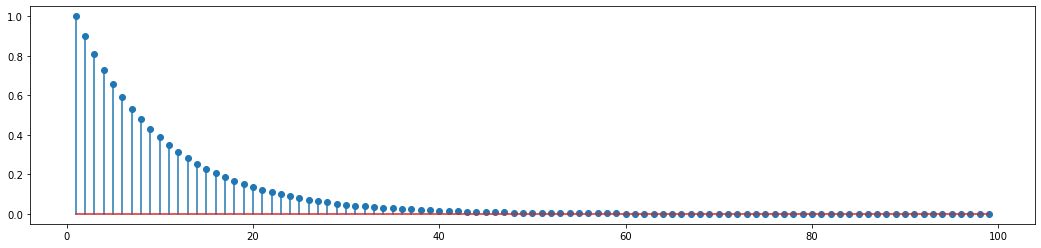

In [59]:
tout, h_n = sig.dimpulse((b_6, a_6, 1))
#print(tout, h_n)
tout, h_n = tout[1:], h_n[0][1:]
plt.figure(figsize = (18, 4))
plt.stem(tout,  h_n)
plt.show()

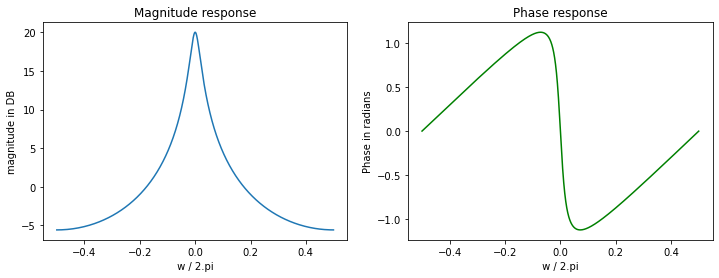

In [60]:
# DTFT of h[n] 
get_freq_resp(h_n,1)

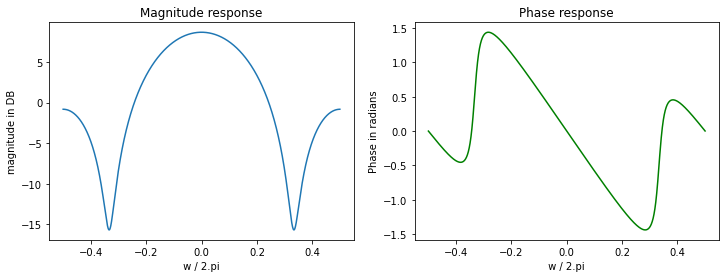

In [61]:
# DTFT hn[n]
get_freq_resp(h_n[:3],1)

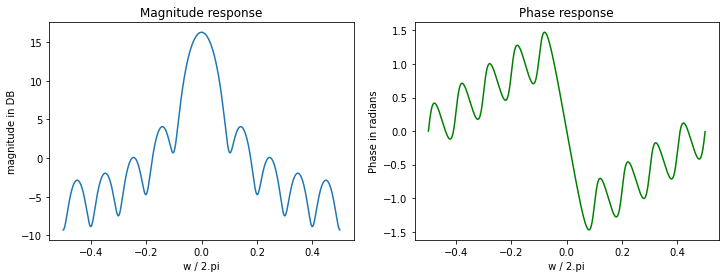

In [62]:
# DTFT hn[n]
#print(h_n[:10])
get_freq_resp(h_n[:10],1)

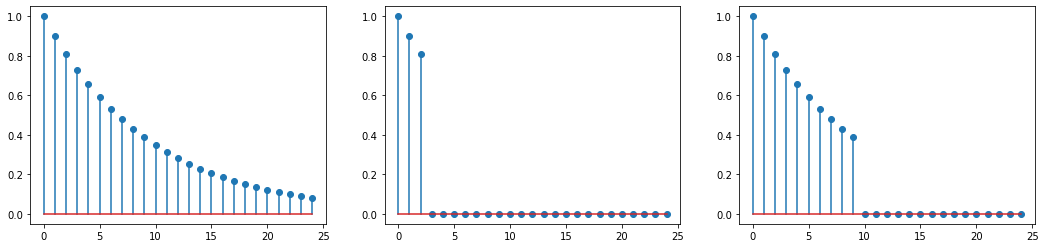

In [85]:
plt.figure(figsize = (18, 4))
h_n1 = h_n.reshape(-1)
x1 = np.zeros((25))
x1[0] = 1

op1 = sig.lfilter(h_n1, 1, x1)
op2 = sig.lfilter(h_n1[:3], 1, x1)
op3 = sig.lfilter(h_n1[:10], 1, x1)

plt.subplot(131)
plt.stem(op1)

plt.subplot(132)
plt.stem(op2)

plt.subplot(133)
plt.stem(op3)

plt.show()

-----

Q7. Consider the following averaging filters..
<ol>
  <li>$ y[n] = \frac{1}{N} \sum_{k=0}^{N-1} x[n − k]$ (N point moving average) </li>
  <li>$ y[n] = \frac{2}{N(N+1)} \sum_{k=0}^{N-1} (N-k)x[n − k]$ (N point weighted average)  </li>
  <li>$ y[n] − αy[n − 1] = (1 − α)x[n]$; $α = \frac{N−1}{N+1} $ (First order exponential average) </li>   
</ol>

a)Sketch the magnitude response of each filter with  N=9.

b) Generate the signal $x[n] = 1 − 0.6^n$; $0 ≤ n ≤ 299$. Add a gaussian white noise signal $e[n]$ with variance 0.1. (use the command <i>numpy.random.randn</i> to generate $e[n]$ ) to obtain a noisy version $y[n] = x[n]+e[n]$ of the signal. Filter the signal through each averaging filter and compare the results.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html

In [ ]:
n = np.arange(300)

xn = np.ones(300) - np.ones(300)*(0.6**n)
en = 0.01 * np.random.randn(300)

plt.figure(figsize = (17, 15))
plt.subplot(311)
plt.stem(xn[:50])
plt.title('x[n]')

plt.subplot(312)
plt.stem(en[:50])
plt.title('e[n]')

yn = xn + en
plt.subplot(313)
plt.stem(yn[:50])
plt.title('y[n]')
plt.show()

In [ ]:
# --- y[n] = 1/9 (x[n]+x[n-1]+......+x[n-8]) ---- #
b_71 = 1/9*np.ones(9)
a_71 = 1
get_freq_resp(b_71,a_71)

yn_71 = sig.lfilter(b_71, a_71, yn)
plt.figure(figsize = (17, 6))
plt.subplot(211)
plt.stem(yn[:50])
plt.title('y[n] = x[n] + e[n]')
plt.subplot(212)
plt.stem(yn_71[:50])
plt.title('Output from avg moving filter')
plt.show()

In [ ]:
### Part 2: y[n] = (2/72)*(9x[n]+8x[n-1]+.......+x[n-8])
b_72 = [9/36,8/36,7/36,6/36,5/36,4/36,3/36,2/36,1/36]
a_72=1
get_freq_resp(b_72,a_72)

yn_72 = sig.lfilter(b_72, a_72, yn)
plt.figure(figsize = (17, 6))
plt.subplot(211)
plt.stem(yn[:50])
plt.title('y[n] = x[n] + e[n]')
plt.subplot(212)
plt.stem(yn_72[:50])
plt.title('Output from weighted avg filter')
plt.show()

In [ ]:
# ---- y[n]-0.8y[n-1] = 0.2x[n] ----#
b_73 = [0.2]
a_73 = [1, -0.8]
get_freq_resp(b_73,a_73)

yn_73 = sig.lfilter(b_73, a_73, yn)
plt.figure(figsize = (17, 6))
plt.subplot(211)
plt.stem(yn[:50])
plt.title('y[n] = x[n] + e[n]')
plt.subplot(212)
plt.stem(yn_73[:50])
plt.title('Output from first order exponential filter')
plt.show()

---

Q8. Digital filters can be used to compensate for the sinc distortion of a ZOH DAC by providing $\frac{1}{sinc(\omega)}$ boost. Two such Filters are
<ol>
  <li>$ y[n] = \frac{1}{16}(x[n]− 18x[n − 1] + x[n − 2])$ </li>
  <li>$ y[n] + 0.125y[n − 1] = 1.125x[n]$ </li>  
</ol>
For each filter, state whether it is FIR (and if so linear phase) or IIR. Plot the magnitude response of each filter and compare with $\frac{1}{sinc(\omega)}$  function. Over what digital frequency range does each filter provide the required
sinc boost?

In [ ]:
#get_freq_resp(np.ones(10), 1)

In [ ]:
#part 1, 𝑦[𝑛]=116(𝑥[𝑛]−18𝑥[𝑛−1]+𝑥[𝑛−2])

b_81 = [1/16, -18/16, 1/16]
a_81 = 1
get_freq_resp(b_81,a_81)

In [ ]:
#part 2, 𝑦[𝑛]+0.125𝑦[𝑛−1]=1.125𝑥[𝑛]
# 
b_82 = [1.125]
a_82 = [1, 0.125]
get_freq_resp(b_82,a_82)

In [ ]:
w = np.arange(-2*np.pi, 2*np.pi, 4*np.pi/512)
sinc = (np.pi*w )/(np.sin(np.pi*w))

In [ ]:
plt.plot(w,np.abs(sinc))
plt.show()

angles = np.angle(sinc)
plt.plot(w,angles)
plt.show()

**Q8 observations- Part 1 is FIR filter with linear phase.
  Part 2 is an IIR filter.**

---

Q9. Consider the following low pass filters with impulse responses in the form of step function, triangular and sinc functions of length N, given by:
<ol>
  <li>$ h_S[n] = u[n] − u[n − (N − 1)]$ </li>
  <li> $ h_L[n] = tri(\frac{n}{N}) = \begin {cases} 1-\frac{|n|}{N}~~~,~~~|n|\le{N}\\0~~~~~~~~~~~~,~~~elsewhere \end{cases} $
  <li>$ h_L[n]$ = $sinc(\frac{n}{N})$ = $\frac{sin(πn/N)}{πn/N}; \,\, sinc(0) = 1$ </li>  
</ol>

Plot the magnitude response of each function for $N=4$ and $N=8$. How does the response of step, linear and windowed $sinc$ schemes compare with ideal low pass case

In [ ]:
def plot_FDA(w1, h1, title1, flag = 1):
    
    fig = plt.figure(figsize= (15, 4))
    #ax1 = fig.add_subplot(121)
    plt.subplot(121)
    plt.title(title1 + ": Magnitude Plot")
    plt.plot(w1, 20 * np.log10(abs(h1)), 'b')
    if(flag):
        plt.plot(-1*w1, 20 * np.log10(abs(h1)), 'b')
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [rad/sample]')
    plt.grid()
    plt.axis('tight')

    #ax2 = ax1.twinx()
    plt.subplot(122)
    plt.title(title1 + ": Phase Plot")
    angles = (np.angle(h1))
    plt.plot(w1, angles, 'g')
    if(flag):
        plt.plot(-w1, -angles, 'g')
    plt.ylabel('Angle (radians)')
    plt.xlabel('Frequency [rad/sample]')
    plt.grid()

    plt.axis('tight')
    plt.show()

In [ ]:
# part 1, step function with N = 4
N = 4
hs = np.ones(( N-1))
w1, h1 = sig.freqz(hs, whole=True)

plt.stem(hs)

plot_FDA(w1, h1, "u[n] − u[n−(N−1)], N - 4")

In [ ]:
# part 1, step function with N = 8
N = 8
hs = np.ones(( N-1))
w1, h1 = sig.freqz(hs, whole=True)

plt.stem(hs)

plot_FDA(w1, h1, "u[n] − u[n−(N−1)], N = 8")

In [ ]:
def tri(N):
    
    x = np.ones((2*N+1))
    for i in range(-N, N+1, 1):
        x[i + N] = x[i + N] - np.abs(i)/N
    return x

In [ ]:
# part 2, triangular function with N = 4
N = 4
h_tri = tri(N)
plt.figure()
plt.stem(np.arange(-4, 5), h_tri)
w1, h1 = sig.freqz(h_tri, whole=True)

plot_FDA(w1, h1, "FT(tri(4))")

In [ ]:
# part 2, triangular function with N = 8
N = 8
h_tri = tri(N)
plt.figure()
plt.stem(np.arange(-8, 9),  h_tri)
w1, h1 = sig.freqz(h_tri, whole=True)

plot_FDA(w1, h1, "FT(tri(8))")

In [ ]:
# part 3, sinc function with N = 4
N = 4
n = np.arange(-30,30, 1)
h_sinc = np.sinc(n/N)
plt.figure()
plt.stem(np.arange(-30, 30), h_sinc)
w1, h1 = sig.freqz(h_sinc, whole=True)

plot_FDA(w1, h1, "FT(sinc) with N = 4" )

In [ ]:
# part 3, sinc function with N = 8
N = 8
n = np.arange(-30,30, 1)
h_sinc = np.sinc(n/N)
plt.figure()
plt.stem(n, h_sinc)
w1, h1 = sig.freqz(h_sinc, whole=True)

plot_FDA(w1, h1, "FT(sinc) with N = 8", )